# Task 51: Compulsory Task

## Importing Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, silhouette_score

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import USArrests.csv into a dataframe
df = pd.read_csv("USArrests.csv")

# Show top 5 rows of dataframe
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Exploring Data

In [3]:
print('Number of states: {} Number of features: {}'.format(df.shape[0],df.shape[1]))

Number of states: 50 Number of features: 5


Rename 'City' column to 'State' to make the dataframe more accurate.

In [4]:
# Change 'City' to 'State' in variable state.
name_update = {'City': 'State'}

# Apply name_update variable to dataframe, whilst leaving the other columns the same.
df.rename(columns = name_update, inplace = True)

# Check columns to make sure names are now correct.
df.columns 

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

Check for missing values in dataframe.

In [5]:
# Count for missing values
missing_values = df.isnull().sum()

# Create dataframe with 1 column named 'Missing'
show_missing = pd.DataFrame(missing_values, columns=["Missing"])

# Show missing values
show_missing

,Missing
State,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


No missing values, so will now check the data information for each column/feature.

In [6]:
# Examine features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Plot the distribution of data for each feature by plotting histograms.

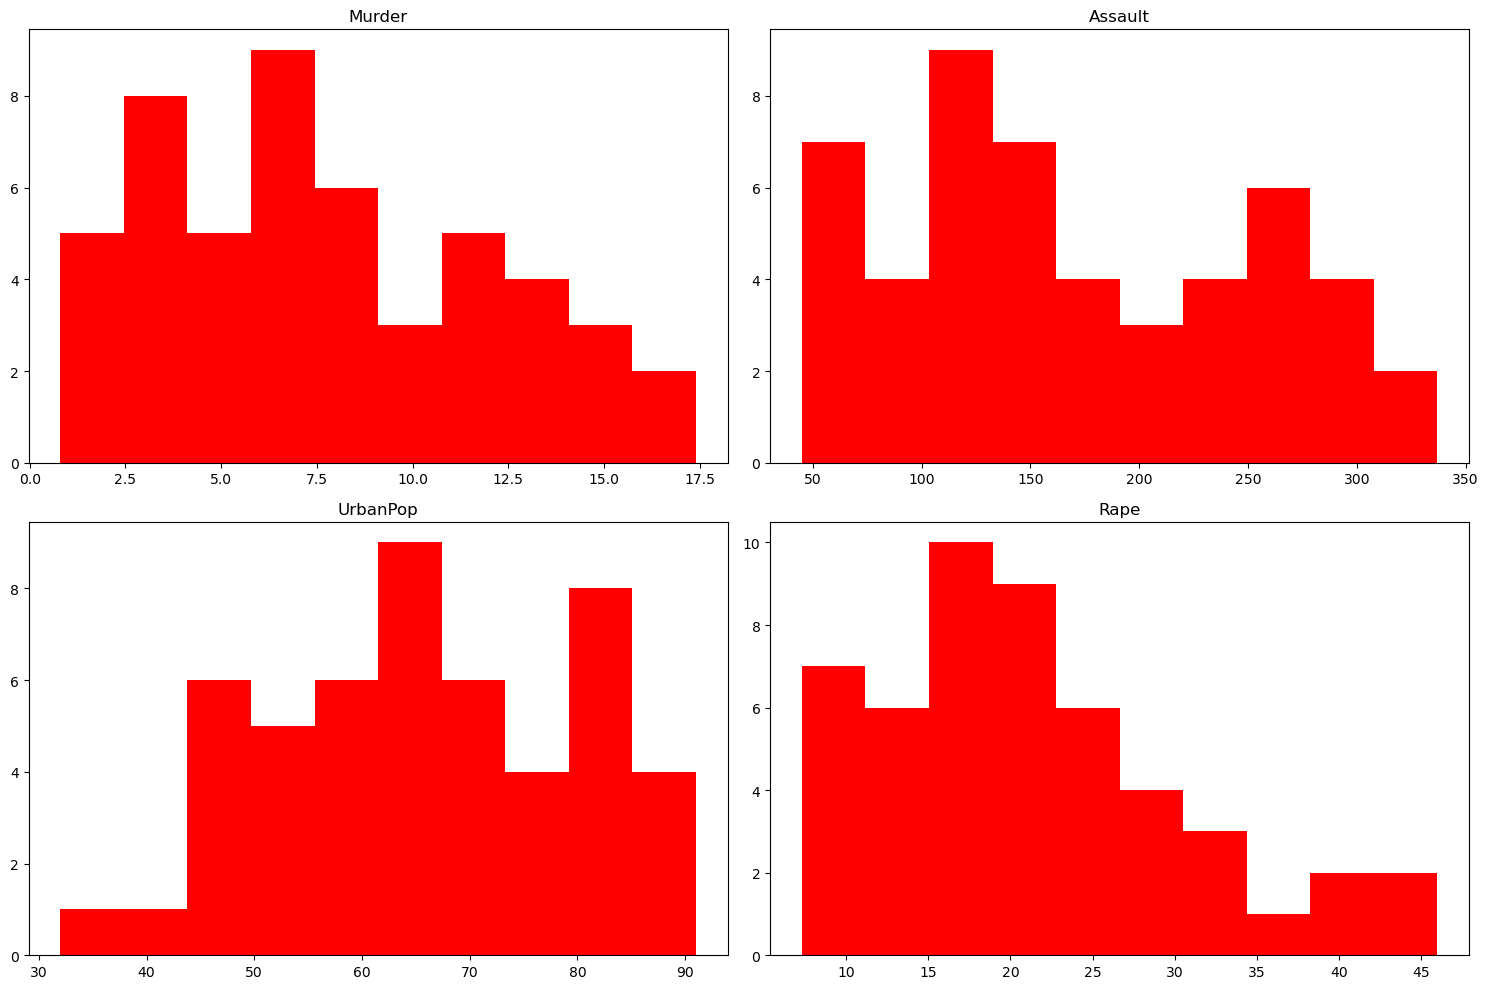

In [7]:
# Plot histograms for thr 4 features
feature_histograms = df.hist(color='red', grid=False, figsize=(15, 10))

# Tight layout to see all 4 of them easily
plt.tight_layout()

# Show the plots
plt.show()

Summarising the statistical properties of the columns:

In [8]:
# Setting decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# Use describe function for insight into the statistical properties of the columns
stats = df.describe()

# Select relevent rows for statistic properties
selected_stats = stats.loc[["mean","std","min","max"]].transpose()

# Show statistical properties table for dataframe
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


At first glance Assualt is the most common crime , with the min of 45 being higher than the max of either Murder (7.79) and Rape (21.23). This is most likely due to Assault being a lesser crime when compared to the other 2. It could also be because Murder and Rape would commonly involve Assault as well, while the opposite not always being the case.

## Correlation Analysis

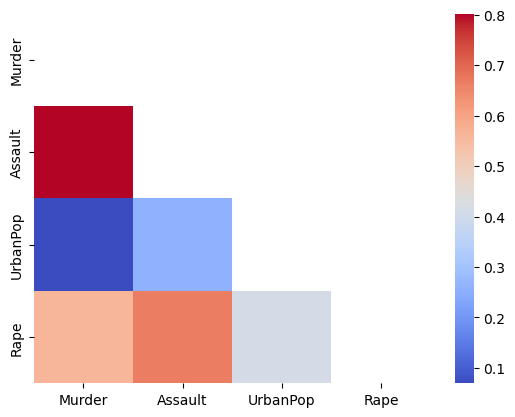

In [9]:
# Define correlation dataframe, drop 'State' column to avoid errors
corr_df = df.drop(["State"],axis=1).corr()

# Get correlations from corr_df
correlations = corr_df.corr()

# Masking the mirrored side of heatmap
mask_ut = np.triu(np.ones(corr_df.shape)).astype(bool)

# Generate heatmap with defined mask and colour map 'coolwarm'
corr_plot = sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")

From the correlation plot above, it is possible to see the following Relationships:
- Murder and Assault have a strong positive relationship (~0.8).
- Murder and Urban-population have a weak positive relationship (~0.1).
- Murder and Rape has a positive relationship (~0.5).
- Assault and Urban-population have a slight positive relationship (~0.3).
- Assault and Rape have a positive relationship (~0.6).
- Urban-population and Rape have a slight positive relationship (~0.45).

The strong relationship between Assault and Murder would suggest that the crimes would often happen in together. It potentially suggests that Assault could lead to an increased chance of Murder or Rape. 

It also shows a weak positive relationship between Murder/Assault and Urban-population, though a slightly stronger population between Rape and Urban-population. This suggests that crime is not heavily dependent on urban-population. Potentially this could mean that other variables not accounted for, such as poverty, would account for crime more than urban-population.


## PCA

In [10]:
# Determine the way floating numbers are displayed.
np.set_printoptions(precision=2)

# Define X
X = df.drop(["State"],axis=1).values.squeeze()

# Define PCA transformation
pca = PCA()

# Apply PCA to X
X_trans = pca.fit_transform(X)

# Define PCA dataframe
df_pca = pd.DataFrame(X_trans)

# Show PCA dataframe
df_pca.head()

,0,1,2,3
0,64.80,11.45,-2.49,2.41
1,92.83,17.98,20.13,-4.09
2,124.07,-8.83,-1.69,-4.35
3,18.34,16.70,0.21,-0.52
4,107.42,-22.52,6.75,-2.81


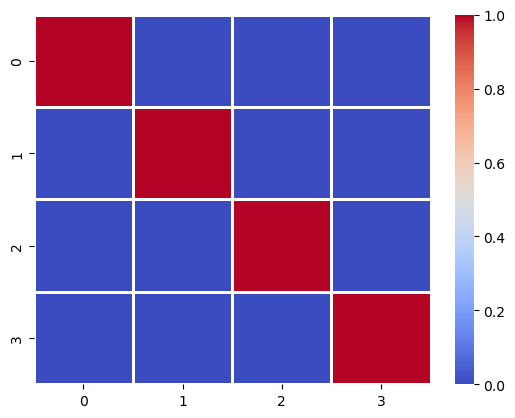

In [11]:
# Showing that the principle components are uncorrelated. 
# It means the PCA has summaried the related information into 4 variables 
pca_proof_plot = sns.heatmap(df_pca.corr(), cmap="coolwarm",linewidth=1)
plt.show()

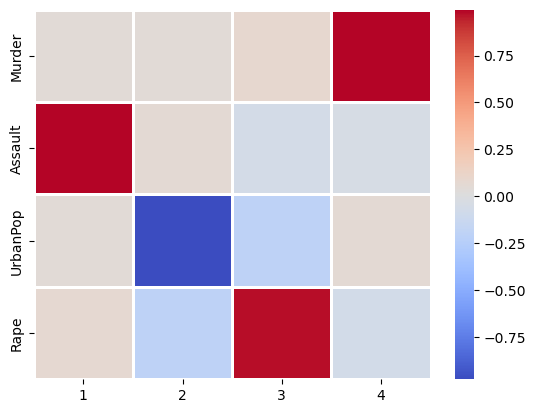

In [12]:
# Defining component for viewing PCA heatmap
components = pd.DataFrame(pca.components_, columns=correlations.columns, index=range(1, 5)).transpose()

# Showing transformed PCA data plot
transformed_data_plot = sns.heatmap(components,cmap="coolwarm",linewidth=1)
plt.show()

The above chart shows that the PCA can be summarised the dataframe into 4 principle components. 

- The first component has a large positive correlation with Assault.
- The second component has a large negative correlation with Urban-population.
- The third component has a large positive correlation with Rape.
- The fourth component has a large positive correlation with Murder.

It is important to see if 4 components can be lowered to 2 components, which will be checked in the next chart.

In [13]:
# Get labels from correlation dataframe
labels =corr_df.columns

# Get state names from 'State' column of main dataframe.
states = df['State']


# Function to plot each state against 2 principle components PC1 and PC2.
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = states[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

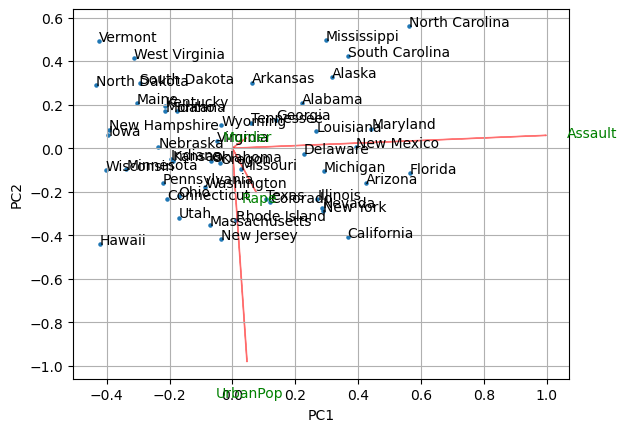

In [14]:
# Calling 'biplot' function, using previously defined PCA variables.
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(states))
plt.show()

The above diagram shows the strong positive relation with Principle Component 1 (PC1) and Assault. It also shows the strong negative relationship with PC2 and Urbanpop.

Both murder and Rape have weaker correlations with both PC1 and PC2, especially compared to Assault and Urbanpop. 

In [15]:
# Defining principle component 1 and 2 in a chart.

# Components x features - access at index 0 to get the first component
pc1 = abs( pca.components_[0] )

# Access at index 1 to get the second component
pc2 = abs( pca.components_[1] )

# Define feature dataframe
feat_df = pd.DataFrame()

# Add column to feat_df listing features from original dataframe.
feat_df["Features"] = list(labels)

# Add column to feat_df listing importance scores against Principle Component 1
feat_df["PC1 Importance"] = pc1

# Add column to feat_df listing importance scores against Principle Component 2
feat_df["PC2 Importance"] = pc2

# View feature dataframe
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.04,0.04
1,Assault,1.00,0.06
2,UrbanPop,0.05,0.98
3,Rape,0.08,0.20


The above table again shows the strong positive relation with PC1 and Assault. It also shows the strong negative relationship with PC2 and Urbanpop (including the weaker negative relationship between PC2 and Rape).

Text(0.5, 0, 'Components')

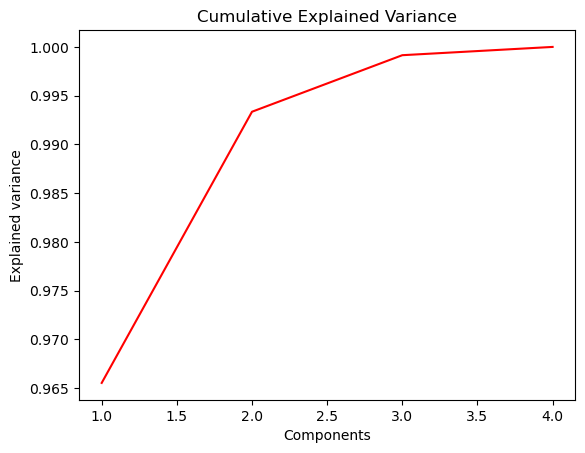

In [16]:
# Plotting Cumulative variance plot
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_), 
         c='red')

# Define plot title and labels
plt.title("Cumulative Explained Variance")
plt.ylabel('Explained variance')
plt.xlabel('Components')

The 'Cumulative Explained Variance' plot shows that with only 2 principle components are needed to account for over 99% of explained variance. 

Text(0.5, 1.0, 'Scree plot')

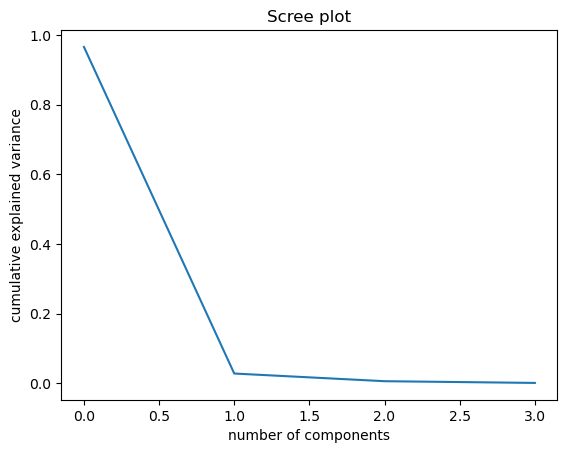

In [17]:
# Plotting Scree plot
plt.plot(pca.explained_variance_ratio_)

# Define plot title and labels
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")

The 'Scree' plot again shows that with only 2 principle components are needed to account for over 90% of explained variance. We began with 4 variables and lowered it down to just 2 that explain most of the data variability.

In [18]:
# Dataframe showing the 2 remaining principle components.
pca_df = pd.DataFrame(X_trans[:,0:2], index = states)
pca_df.head()

,0,1
State,,
Alabama,64.80,11.45
Alaska,92.83,17.98
Arizona,124.07,-8.83
Arkansas,18.34,16.70
California,107.42,-22.52


## Hierarchical clustering

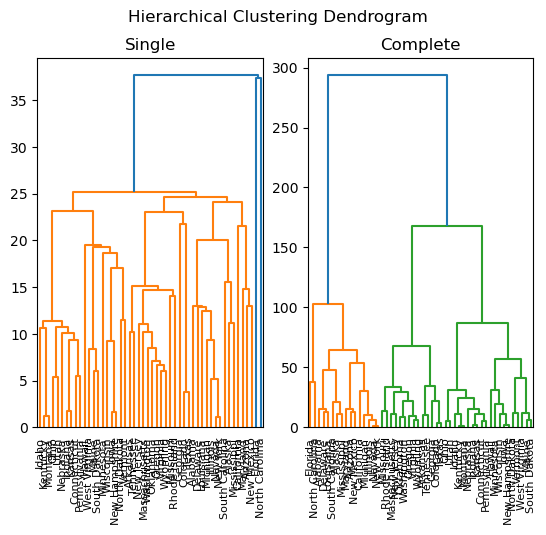

In [19]:
# Plotting 2 seperate dendrograms.
fig, (ax1, ax2) = plt.subplots(1, 2)

# Set title of full plot
fig.suptitle('Hierarchical Clustering Dendrogram')

# Set title of subplot for single linkage dendrogram.
ax1.set_title("Single")

# Define single linkage dendrogram
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...

# Set title of subplot for complete linkage dendrogram.
ax2.set_title("Complete")

# Define complete linkage dendrogram
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax2)
plt.show()

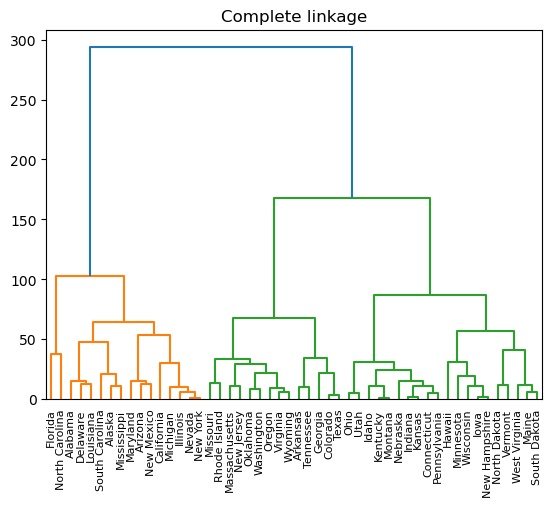

In [20]:
# Title for Complete Linkage Dendrogram
plt.title("Complete linkage")

# Plot Complete linkage Dendogram
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

Text(1.0, 1.0, 'Complete Linage Silhouette = 0.47')

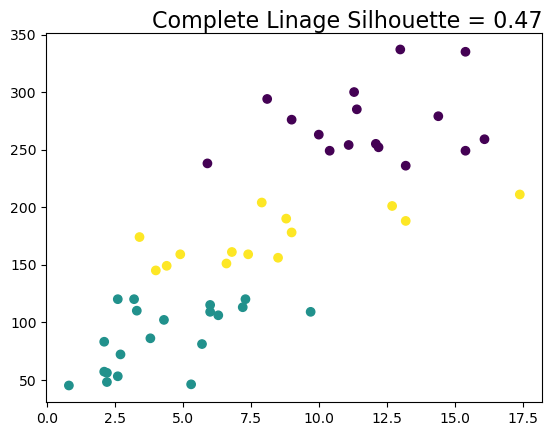

In [21]:
# Number of clusters
K = 3

# Complete linkage model. 
model = AgglomerativeClustering(n_clusters=K, linkage='complete')
model.fit(pca_df)

# Define scatter plot ranges
range_one = X[:,0]
range_two = X[:,1]

# Plot scatter plot
plt.scatter(range_one, range_two, c = model.labels_)

# Calculate and place Silhouette score as title of plot.
model_score = round(silhouette_score(X, model.labels_, metric='cityblock'),2)
plt.title('Complete Linage Silhouette = {}'.format(model_score), loc='right', fontdict={'fontsize': 16}, pad=-14)

Number of states in each grouping:
- Green: 20
- Yellow: 14
- Purple: 16

The Complete Linkage Silhouette score of 0.47 is not the best, suggesting that the clustering method is not very accurate.

## K-means clustering

Text(0, 0.5, 'Dim 1')

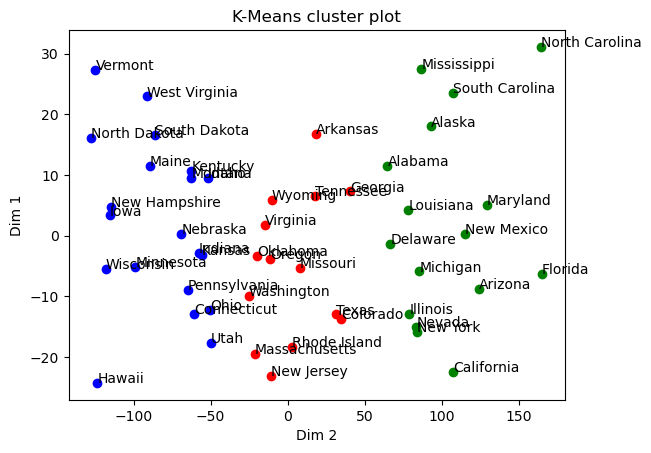

In [22]:
# Extract the first two components of the dataframe
x = X_trans[:,0]
y = X_trans[:,1]

# Use the same k as the previous clustering method
k=3

# Define kmeans  model
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot each of the 3 clusters
fig, ax = plt.subplots()

# Define colour scheme for clusters
colours = 'rbgy'

# Plot each point onto the same scatter plot
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

# Label each point on the scatter plot with the name of each state.
for i in range(0,len(x)):
        txt = states[i]
        ax.annotate(txt, (x[i], y[i]))
    
# Set title and labels for plot
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")

In [23]:
# Groups - Translate to readable names
clusters = pd.DataFrame()

# Find the indices of each cluster group
group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
group2_indices = np.argwhere(cluster_labels==2).transpose()[0]

# Define each state in each cluster group
group0 = np.array(states)[group0_indices]
group1 = np.array(states)[group1_indices]
group2 = np.array(states)[group2_indices]


# Printing states in Group 0
print("Group 0")
print(f"Number in Group 0: {len(group0)}\n")
print(group0)


# Printing states in Group 1
print("\nGroup 1")
print(f"Number in Group 1: {len(group1)}\n")
print(group1)

# Printing states in Group 2
print("\nGroup 2")
print(f"Number in Group 2: {len(group2)}\n")
print(group2)

Group 0
Number in Group 0: 14

['Arkansas' 'Colorado' 'Georgia' 'Massachusetts' 'Missouri' 'New Jersey'
 'Oklahoma' 'Oregon' 'Rhode Island' 'Tennessee' 'Texas' 'Virginia'
 'Washington' 'Wyoming']

Group 1
Number in Group 1: 20

['Connecticut' 'Hawaii' 'Idaho' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Maine' 'Minnesota' 'Montana' 'Nebraska' 'New Hampshire' 'North Dakota'
 'Ohio' 'Pennsylvania' 'South Dakota' 'Utah' 'Vermont' 'West Virginia'
 'Wisconsin']

Group 2
Number in Group 2: 16

['Alabama' 'Alaska' 'Arizona' 'California' 'Delaware' 'Florida' 'Illinois'
 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Nevada' 'New Mexico'
 'New York' 'North Carolina' 'South Carolina']


Both clustering methods result in the same distribution of groups (14, 16 and 20 states in each group). This suggests that both styles of clustering result in similar results.

However the Complete Linkage Silhouette score of 0.47 is not the best, suggesting that the clustering method is not very accurate.